## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load and understand the dataset


In [33]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
df.drop(columns='Id', inplace=True)

In [35]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


3. Visualize the dataset

Text(0.5, 1.0, 'petal_width')

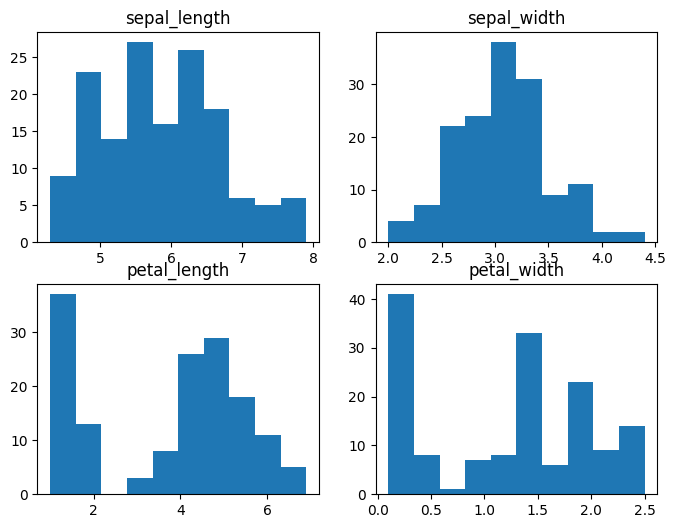

In [36]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

ax[0, 0].hist(df["SepalLengthCm"])
ax[0, 1].hist(df["SepalWidthCm"])
ax[1, 0].hist(df["PetalLengthCm"])
ax[1, 1].hist(df["PetalWidthCm"])

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")

In [37]:
colors = {'Iris-setosa': 'green',
          'Iris-virginica': 'purple',
          'Iris-versicolor': 'blue'}

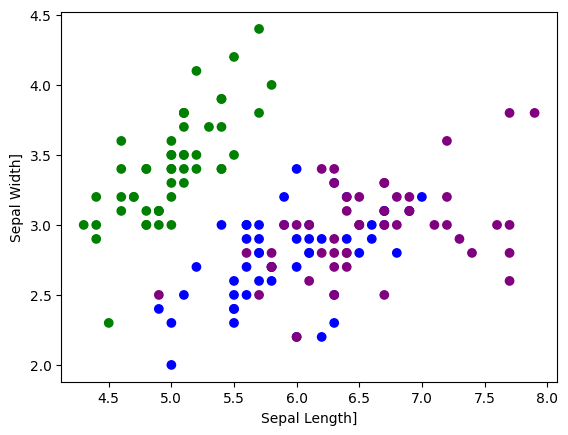

In [38]:
plt.scatter(df["SepalLengthCm"],
            df["SepalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length]")
plt.ylabel("Sepal Width]")
plt.show()

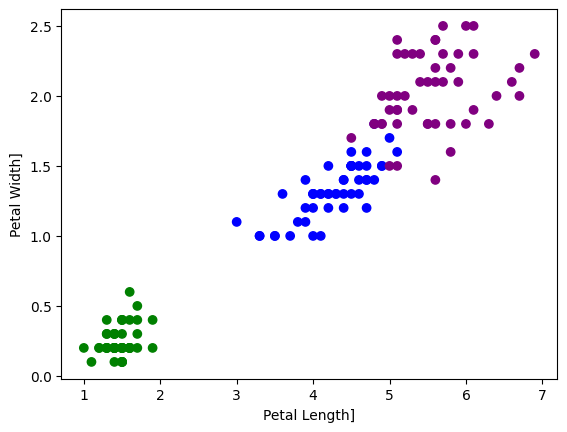

In [39]:
plt.scatter(df["PetalLengthCm"],
            df["PetalWidthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Petal Length]")
plt.ylabel("Petal Width]")
plt.show()

4. Split the dataset into a training set and a testing set

In [40]:
# Array of features
X = df.drop(columns=['Species']).values
print(X.shape)
# Array of Labels
y = df['Species'].values
print(y.shape)

(150, 4)
(150,)


In [41]:
# y = Label and X = Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


5. Create the model

- Train the model using the training set
- Test the model using the testing set
- Measure the accuracy

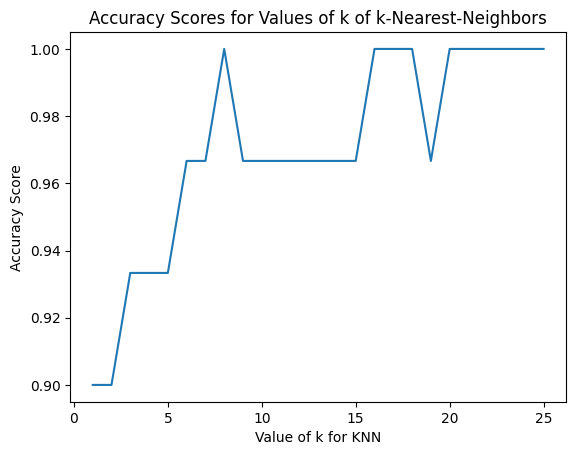

In [42]:
# Experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

6. Test the model using unseen data

In [43]:
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [44]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6,6,3,5]])

array(['Iris-virginica'], dtype=object)